# Newton's Method

Newton's method is using linear approximation to solve the root finding problems.<br>
<img src='https://jmahaffy.sdsu.edu/courses/f00/math122/lectures/newtons_method/images/newton_graph.jpg'>

## Hypothesis

1. The given function $f: (a,b) \to \mathbb{R}$ is differentiable on the interval $(a,b)$.
2. The current approximation solutions $x_n$ are in the interval $(a,b)$.

## Formula

Suppose the function $f : (a,b) \to \mathbb{R}$ is a differentiable function defined on the interval $(a,b)$ with values in the real numbers $\mathbb{R}$, and we have some current approximation $x_n$.
<br><br>
Then we can derive the formula for a better approximation, $x_{n+1}$ by referring to the diagram on the right.
<br><br>
The equation of the tangent line to the curve $y = f(x)$ at $x = x_n$ is<br>
    $$y = f'(x_n)(x - x_n) + f(x_n),$$
where $f'$ denotes the derivative.
<br><br>
The $x$-intercept of this line is taken as the next approximation, $x_{n+1}$, to the root, so that the equation of the tangent line is satisfied when $(x,y) = (x_{n+1}, 0)$:<br>
    $$0 = f'(x_n)(x_{n+1} - x_n) + f(x_n).$$
Solving for $x_{n+1}$ gives
    $$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.$$

## Alogrithm

1. Given a guessing solution $x_0$ for $f(x) = 0$ and the values of $f(x_0)$.
2. Find the differential value $f'(x_0)$.
3. Find the next approximation solution $x_1$ by using the formula $x_1 = x_0 - \dfrac{f(x_0)}{f'(x_0)}$. 
4. Repeat the _step 2_ and the _step 3_ to find the following approximations $x_2, x_3, \dots, x_n$ until until some criterions satisfied (For instance, max iterations, error tolerance, etc.).
5. Return the approximation solution $x_n$.

## Implementation

### Part 0. Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Part 1. Implement with only tolerance

In [2]:
def newton(
    func,
    d_func,
    x_0,
    tolerance=1e-7
):
    '''
    Parameters
    ----------
    func : function
        The target function.
    d_func : function
        The derivative of the target function.
    x_0 : float
        Initial guess point for a solution f(x)=0.
    tolerance : float
        One of the termination conditions. Error tolerance.

    Returns
    -------
    solution : float
        Approximation of the root.
    '''
    # Set the initial conditions
    x_n = x_0
    
    while True:
        
        # Find the value of f(x_n)
        f_of_x_n = func(x_n)
        
        # Evaluate the error
        error = abs(f_of_x_n)
        
        # Satisfy the criterion and stop
        if error < tolerance:
            return x_n
        
        # Find the differential value of f'(x_n)
        d_f_of_x_n = d_func(x_n)
        
        # Find the next approximation solution
        x_n = x_n - f_of_x_n / d_f_of_x_n
        

### Test the function

In [3]:
print(newton(
    func = lambda x: (x - 2)**2,
    d_func = lambda x: 2*x - 4,
    x_0 = 1,
#     tolerance=1e-7
))

1.999755859375


### Find the bug!

Consider the point $x_i$ such that the differential value $f'(x_i) = 0$, then what will happen?<br>

For example, solving
    $$f(x) = (x - 2)^2 - 1\,\,\,\text{ with the initial point }\,x_0 = 2$$

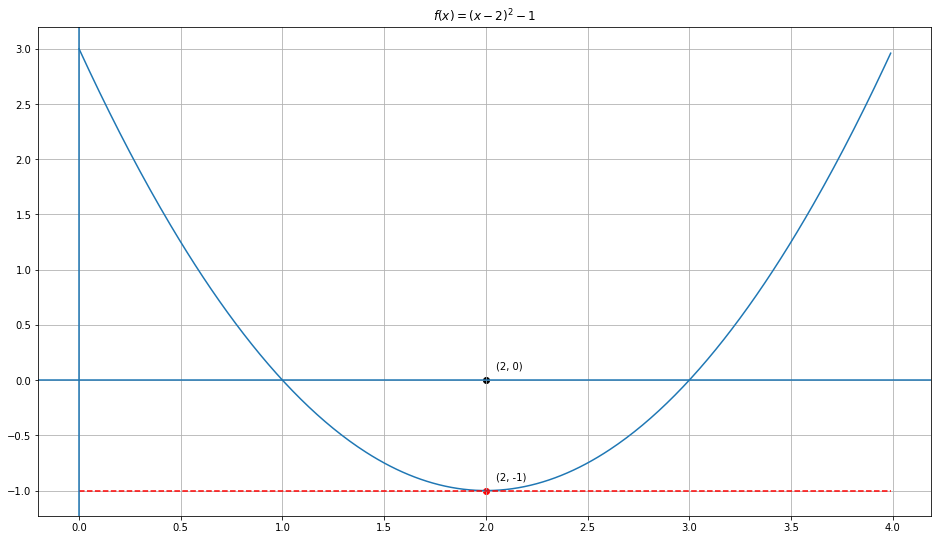

In [4]:
# Visualize f(x) on [0, 4]

f = lambda x: (x - 2)**2 - 1
d_f = lambda x: 2*x - 4
x_0 = 2
f_of_x_0 = f(x_0)

search_range = np.arange(0, 4, 0.01)
fig, ax = plt.subplots(figsize=(16, 9))

# Plot the function f(x)
ax.plot(search_range, f(search_range))

# Plot the point (x_0, 0)
ax.scatter(x_0, 0, color='black')
ax.annotate('('+str(x_0)+', 0)', (x_0+0.05, 0+0.1))

# Plot the point (x_0, f(x_0))
ax.scatter(x_0, f_of_x_0, color='r')
ax.annotate('('+str(x_0)+', '+str(f_of_x_0)+')', (x_0+0.05, f_of_x_0+0.1))

# Plot the tangent line at (x_0, f(x_0))
ax.plot(search_range, f(x_0)*np.ones(search_range.shape[0]), color='r', ls='--')

# Add other text and items
ax.set_title(r'$f(x) = (x - 2)^2 - 1$')
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

In [5]:
print(newton(
    func = lambda x: (x - 2)**2 - 1,
    d_func = lambda x: 2*x - 4,
    x_0 = 2,
#     tolerance=1e-7
))

ZeroDivisionError: division by zero

### Observation:

In the above case, since the differential value is zero, we cannot continue to find the next approximation solution.<br>

> **NOTE**: You can output the error message and also stop the loop!

### Part 2. Stop the loop when f'(x) = 0 and return " _None_ "

In [6]:
def newton(
    func,
    d_func,
    x_0,
    tolerance=1e-7
):
    '''
    Parameters
    ----------
    func : function
        The target function.
    d_func : function
        The derivative of the target function.
    x_0 : float
        Initial guess point for a solution f(x)=0.
    max_iterations : int
        One of the termination conditions. The amount of iterations allowed.

    Returns
    -------
    solution : float
        Approximation of the root.
    '''
    # Set the initial conditions
    x_n = x_0
    
    while True:
        
        # Find the value of f(x_n)
        f_of_x_n = func(x_n)
        
        # Evaluate the error
        error = abs(f_of_x_n)
        
        # Satisfy the criterion and stop
        if error < tolerance:
            return x_n
        
        # Find the differential value of f'(x_n)
        d_f_of_x_n = d_func(x_n)
        
        if d_f_of_x_n == 0:
            print('Zero derivative. No solution found.')
            return None
        
        # Find the next approximation solution
        x_n = x_n - f_of_x_n / d_f_of_x_n
        

### Test the same case again

In [7]:
print(newton(
    func = lambda x: (x - 2)**2 - 1,
    d_func = lambda x: 2*x - 4,
    x_0 = 2,
    # tolerance=1e-7
))

Zero derivative. No solution found.
None


### Let's go through another case

Consider another function $f(x) = x^3 - 2x + 2$ and take $x_0 = 0$ as the starting
point. 

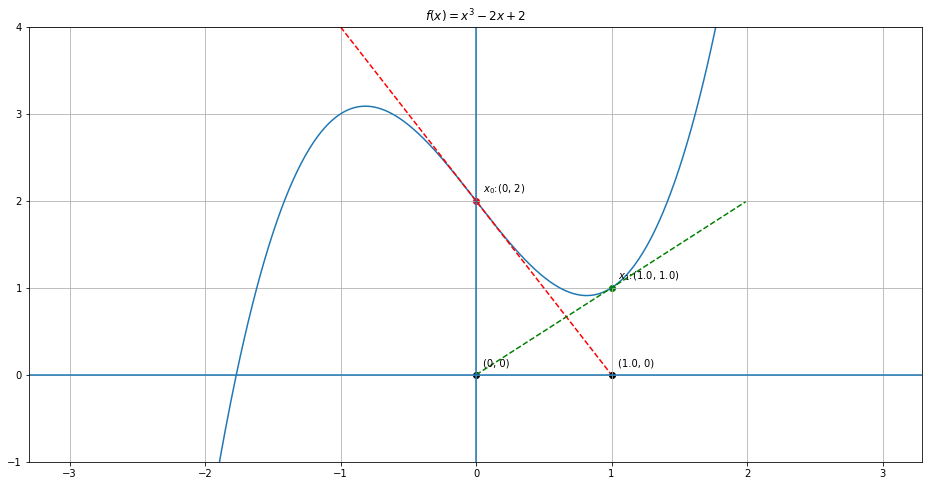

In [8]:
# Visualize f(x) on [-2, 2]

f = lambda x: x**3 - 2*x + 2
d_f = lambda x: 3*x**2 - 2
search_range = np.arange(-3, 3, 0.01)
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the function f(x)
ax.plot(search_range, f(search_range))

# Plot the initial point
x_0 = 0
f_of_x_0 = f(x_0)
d_f_of_x_0 = d_f(x_0)
ax.scatter(x_0, 0, color='black')
ax.annotate('(0, 0)',(0+0.05, 0+0.1))
ax.scatter(x_0, f_of_x_0, color='r')
ax.annotate('$x_0$:(0, '+str(f_of_x_0)+')', (0+0.05, f_of_x_0+0.1))
ax.plot(np.arange(-1, 1, 0.01),
        d_f_of_x_0*(np.arange(-1, 1, 0.01)-x_0)+f(x_0)*np.ones(np.arange(-1, 1, 0.01).shape[0]),
        color='r',
        ls='--')

# Plot the next approximation solution
x_1 = x_0 - f_of_x_0/d_f_of_x_0
f_of_x_1 = f(x_1)
d_f_of_x_1 = d_f(x_1)
ax.scatter(x_1, 0, color='black')
ax.annotate('('+str(x_1)+', 0)', (x_1+0.05, 0+0.1))
ax.scatter(x_1, f_of_x_1, color='green')
ax.annotate('$x_1$:('+str(x_1)+', '+str(f_of_x_1)+')', (x_1+0.05, f_of_x_1+0.1))
ax.plot(np.arange(0, 2, 0.01),
        d_f(x_1)*(np.arange(0, 2, 0.01)-x_1)+f(x_1)*np.ones(np.arange(0, 2, 0.01).shape[0]),
        color='green',
        ls='--')

# Add other text and items
ax.set_title(r'$f(x) = x^3 - 2x + 2$')
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.ylim(-1,4)
plt.show()

In [9]:
print(newton(
    func = lambda x: x**3 - 2*x + 2,
    d_func = lambda x: 3*x**2 - 2,
    x_0 = 0,
    # tolerance=1e-7
))

KeyboardInterrupt: 

> **NOTE**: You can stop the running process by pressing the __stop button__ on the tools bar above.

### Part 3. Avoid endless loop by limiting the amount of iterations

In [10]:
def newton(
    func,
    d_func,
    x_0,
    tolerance=1e-7,
    max_iterations=5
):
    '''
    Parameters
    ----------
    func : function
        The target function.
    d_func : function
        The derivative of the target function.
    x_0 : float
        Initial guess point for a solution f(x)=0.
    tolerance : float
        One of the termination conditions. Error tolerance.
    max_iterations : int
        One of the termination conditions. The amount of iterations allowed.

    Returns
    -------
    solution : float
        Approximation of the root.
    '''
    # Set the initial conditions
    x_n = x_0
    num_iterations = 0
    
    while True:
        
        # Find the value of f(x_n)
        f_of_x_n = func(x_n)
        
        # Evaluate the error
        error = abs(f_of_x_n)
        
        # Satisfy the criterion and stop
        if error < tolerance:
            print('Found solution after',num_iterations,'iterations.')
            return x_n
        
        # Find the differential value of f'(x_n)
        d_f_of_x_n = d_func(x_n)
        
        # Avoid zero derivative
        if d_f_of_x_n == 0:
            print('Zero derivative. No solution found.')
            return None
        
        # Check the number of iterations
        if num_iterations < max_iterations:
            num_iterations += 1
            
            # Find the next approximation solution
            x_n = x_n - f_of_x_n / d_f_of_x_n
            
        # Satisfy the criterion and stop
        else:
            print('Terminate since reached the maximum iterations.')
            return x_n

### Test the same case again

In [11]:
print(newton(
    func = lambda x: x**3 - 2*x + 2,
    d_func = lambda x: 3*x**2 - 2,
    x_0 = 0,
#     tolerance=1e-7,
#     max_iterations=10
))

Terminate since reached the maximum iterations.
1.0


## Example

Let's using the same function in bisection method 

$$f(x) = x^2 - x - 1 = 0$$

### Step1. Construct the target function.

In [12]:
def f(x):
    return x**2 - x - 1

def d_f(x):
    return 2*x - 1

### Step2. Guess the possible solution

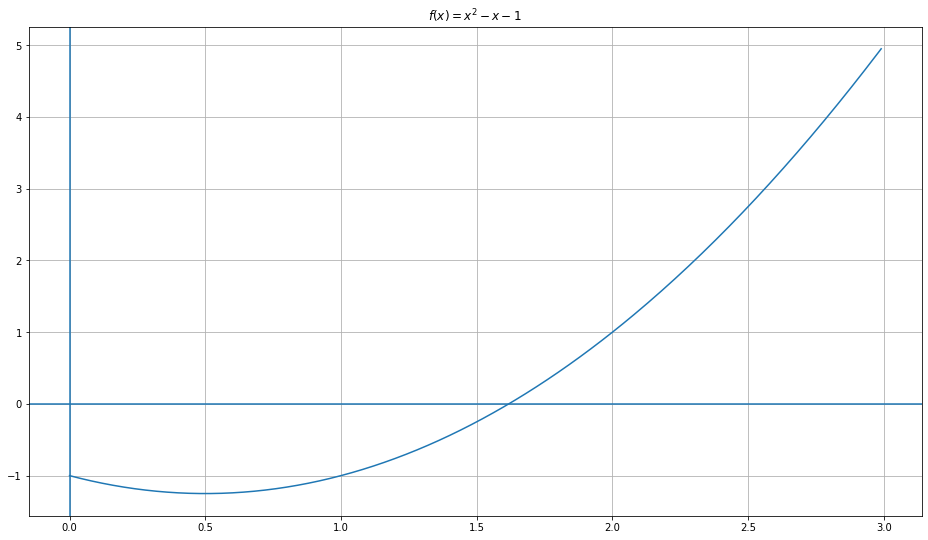

In [13]:
fig, ax = plt.subplots(figsize=(16, 9))
search_range = np.arange(0, 3, 0.01)
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x) = x^2 - x - 1$')
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### Observation:

It seems that we can choose the point $1.5$ or $2$ to be the initial guessing point.

### Step3. Start solving!

In [14]:
my_initial_point = 2                  # Maybe 1.5 or 2 is a good choice

solution = newton(
    f,
    d_f,
    my_initial_point,
    tolerance=1e-7,
    max_iterations=10
)
print(solution)

Found solution after 4 iterations.
1.618033988749989


### Let's compare with the exact solution

In [15]:
exact_solution = (1 + np.sqrt(5)) / 2
print('The error is', abs(solution - exact_solution))

The error is 9.414691248821327e-14


## Error Analysis

Furthermore, we can store the history of solving process to study the convergence behavior of this method.

In [16]:
def newton(
    func,
    d_func,
    x_0,
    tolerance=1e-7,
    max_iterations=5,
    report_history=False
):
    '''
    Parameters
    ----------
    func : function
        The target function.
    d_func : function
        The derivative of the target function.
    x_0 : float
        Initial guess point for a solution f(x)=0.
    tolerance : float
        One of the termination conditions. Error tolerance.
    max_iterations : int
        One of the termination conditions. The amount of iterations allowed.
    report_history: bool
        Whether to return history.

    Returns
    -------
    solution : float
        Approximation of the root.
    history: dict
        Return history of the solving process if report_history is True.
    '''
    # Set the initial conditions
    x_n = x_0
    num_iterations = 0
    
    # history of solving process
    if report_history:
        history = {'estimation': [], 'error': []}
    
    while True:
        
        # Find the value of f(x_n)
        f_of_x_n = func(x_n)
        
        # Evaluate the error
        error = abs(f_of_x_n)
        
        if report_history:
            history['estimation'].append(x_n)
            history['error'].append(error)
        
        # Satisfy the criterion and stop
        if error < tolerance:
            print('Found solution after', num_iterations,'iterations.')
            if report_history:
                return x_n, history
            else:
                return x_n
        
        # Find the differential value of f'(x_n)
        d_f_of_x_n = d_func(x_n)
        
        # Avoid zero derivative
        if d_f_of_x_n == 0:
            print('Zero derivative. No solution found.')
            if report_history:
                return None, history
            else:
                return None
        
        # Check the number of iterations
        if num_iterations < max_iterations:
            num_iterations += 1
            
            # Find the next approximation solution
            x_n = x_n - f_of_x_n / d_f_of_x_n
        
        # Satisfy the criterion and stop
        else:
            print('Terminate since reached the maximum iterations.')
            if report_history:
                return x_n, history
            else:
                return x_n

In [17]:
solution, history = newton(
    f,
    d_f,
    my_initial_point,
    tolerance=1e-16,
    max_iterations=100,
    report_history=True
)
print(solution)

Found solution after 5 iterations.
1.618033988749895


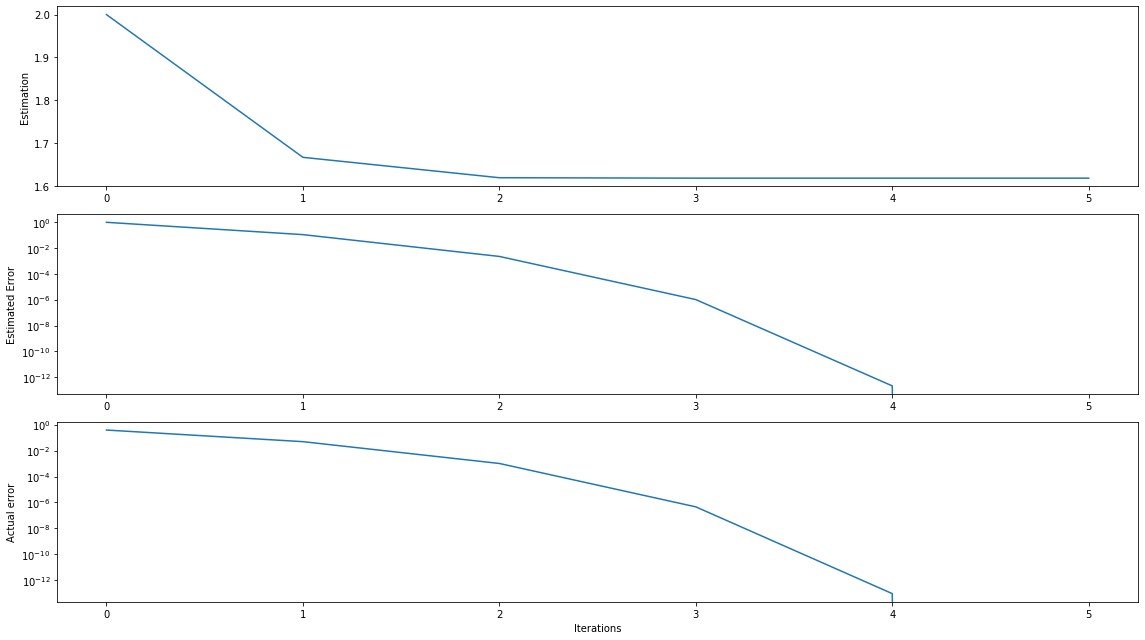

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(16, 9))
ax1, ax2, ax3 = axes

num_iterations = len(history['estimation'])
iterations = range(num_iterations)
for ax in axes:
    ax.set_xticks(iterations)

# Plot the estimation in history
ax1.plot(iterations, history['estimation'])
ax1.set_ylabel('Estimation')

# Plot the estimation error (log(error)) in history
ax2.plot(iterations, history['error'])
ax2.set_ylabel('Estimated Error')
ax2.set_yscale('log')

# Plot the estimation actual error (estimation - exact solution) in history
actual_error = np.abs(history['estimation']-exact_solution)
ax3.plot(iterations, actual_error)
ax3.set_ylabel('Actual error')
ax3.set_yscale('log')
ax3.set_xlabel('Iterations')

plt.tight_layout()
plt.show()

## Advantages and Disadvantages

### Advantages

1. Converges very quickly.

### Disadvantages

1. _**Not guaranteed to converge**_ .
2. Need to compute values of the derivative of the function.
3. Don't know how close we are to a solution.

## End